Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       135
           1       0.93      0.68      0.79       956
           2       0.76      0.86      0.81      2451
           3       0.75      0.77      0.76      1853
           4       0.96      0.65      0.78       384
           5       0.94      0.94      0.94       102

    accuracy                           0.79      5881
   macro avg       0.88      0.80      0.83      5881
weighted avg       0.80      0.79      0.79      5881



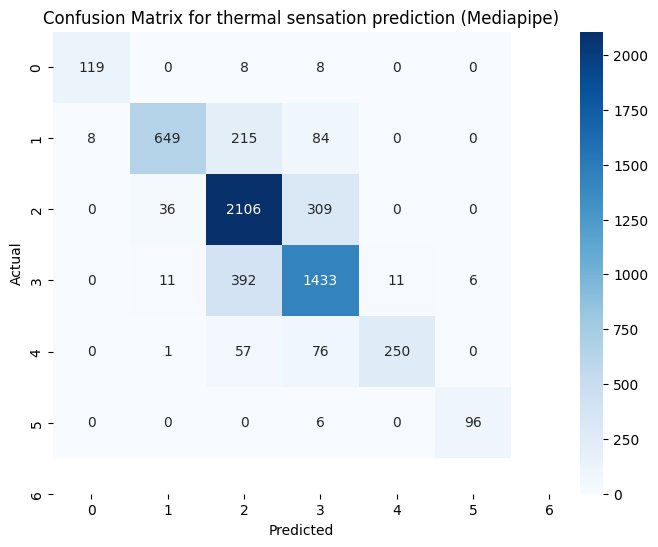

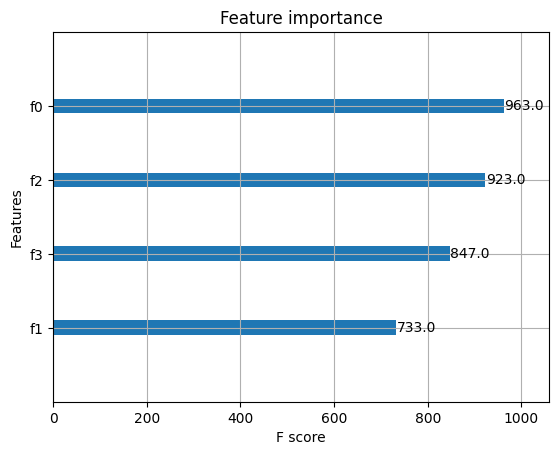

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from xgboost import plot_importance
# Step 1: Load the dataset
# Replace 'your_dataset.csv' with your actual dataset path
df = pd.read_csv(r'C:\Users\AMUS\python\mediapipe\mediapipe_algorithm.csv')

# Step 2: Clean and preprocess the data
# Drop rows with NaN values in the 'Votes' column
df = df.dropna(subset=["sensation"])

# Map vote classes to start from 0 (required by XGBoost)
class_mapping = {-3: 0, -2: 1, -1: 2, 0: 3, 1: 4, 2: 5, 3: 6}  # Adjust as needed
df["sensation"] = df["sensation"].map(class_mapping)

# Ensure no NaN values are present after mapping
assert df["sensation"].isna().sum() == 0, "Mapping introduced NaN values. Check the data."

# Prepare features (X) and target (y)
X = df[["HeadAll_Temperature", "HandAll_Temperature", "ShinAll_Temperature", "BackAll_Temperature"]].values  # Multiple features
y = df["sensation"].values.astype(int)  # Target labels as integers

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the XGBoost Classifier
xg_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # Classification objective
    num_class=len(set(y)),     # Number of unique vote categories
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.1,         # Step size shrinkage
    max_depth=3,               # Maximum tree depth
    random_state=42
)

# Train the model
model = xg_clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = xg_clf.predict(X_test)

# Step 6: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(class_mapping.values()), yticklabels=sorted(class_mapping.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for thermal sensation prediction (Mediapipe)")
plt.show()

# Step 7: Save and Load the Model
# Save the trained model to a file
joblib.dump(xg_clf, "xgboost_votes_classifier.pkl")

# Load the saved model (if needed)
xg_clf_loaded = joblib.load("xgboost_votes_classifier.pkl")
plot_importance(model)
plt.show()
# Use the loaded model to make predictions
# y_pred_loaded = xg_clf_loaded.predict(X_test)


Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       386
           1       0.68      0.82      0.75      1741
           2       0.67      0.77      0.72      1867
           3       0.77      0.64      0.70      1379
           4       1.00      0.56      0.71       412
           5       1.00      1.00      1.00        30

    accuracy                           0.72      5815
   macro avg       0.85      0.71      0.75      5815
weighted avg       0.75      0.72      0.72      5815



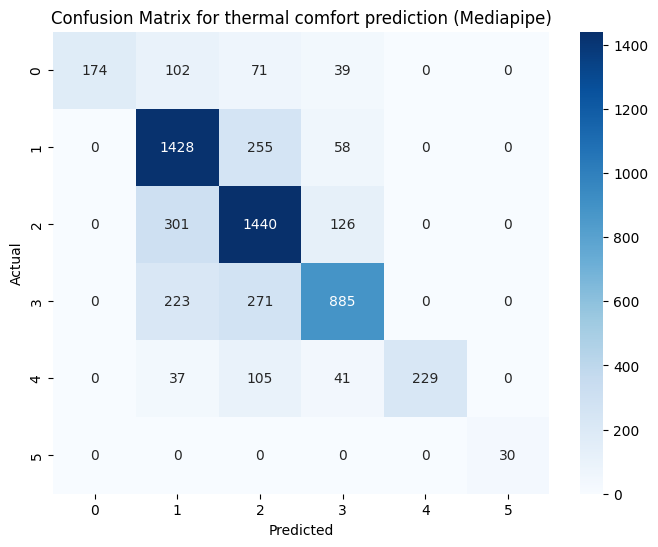

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with your actual dataset path
df = pd.read_csv(r'C:\Users\AMUS\python\mediapipe\mediapipe_algorithm.csv')

class_mapping = {-3: 0, -2: 1, -1: 2, 1: 3, 2: 4, 3: 5}

# Apply mapping to comfort column
df["comfort"] = df["comfort"].map(class_mapping)

# Check for NaN values and handle them
df["comfort"].isna().sum() > 0


# Drop NaN rows if there are any
df = df.dropna(subset=["comfort"])

# Verify unique comfort values
df["comfort"].unique()

# Now proceed with your usual feature extraction and model training steps
X = df[["HeadAll_Temperature", "HandAll_Temperature", "ShinAll_Temperature", "BackAll_Temperature"]].values
y = df["comfort"].values.astype(int)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the XGBoost Classifier
xg_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # Classification objective
    num_class=len(set(y)),     # Number of unique vote categories
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.1,         # Step size shrinkage
    max_depth=3,               # Maximum tree depth
    random_state=42
)

# Train the model
xg_clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = xg_clf.predict(X_test)

# Step 6: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(class_mapping.values()), yticklabels=sorted(class_mapping.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for thermal comfort prediction (Mediapipe)")
plt.show()

# Step 7: Save and Load the Model
# Save the trained model to a file
joblib.dump(xg_clf, "xgboost_votes_classifier1.pkl")

# Load the saved model (if needed)
xg_clf_loaded = joblib.load("xgboost_votes_classifier1.pkl")

# Use the loaded model to make predictions
# y_pred_loaded = xg_clf_loaded.predict(X_test)


Yolo algorithm

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        35
           1       0.98      0.61      0.75       361
           2       0.79      0.86      0.83       863
           3       0.79      0.89      0.84       738
           4       1.00      0.81      0.89       115
           5       1.00      1.00      1.00        44

    accuracy                           0.83      2156
   macro avg       0.93      0.82      0.86      2156
weighted avg       0.84      0.83      0.82      2156



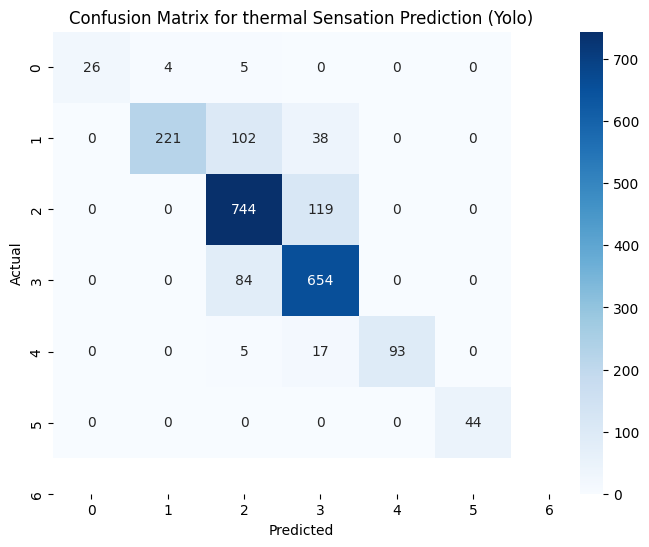

C:\Users\AMUS\AppData\Local\Temp\ipykernel_3240\3667122089.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


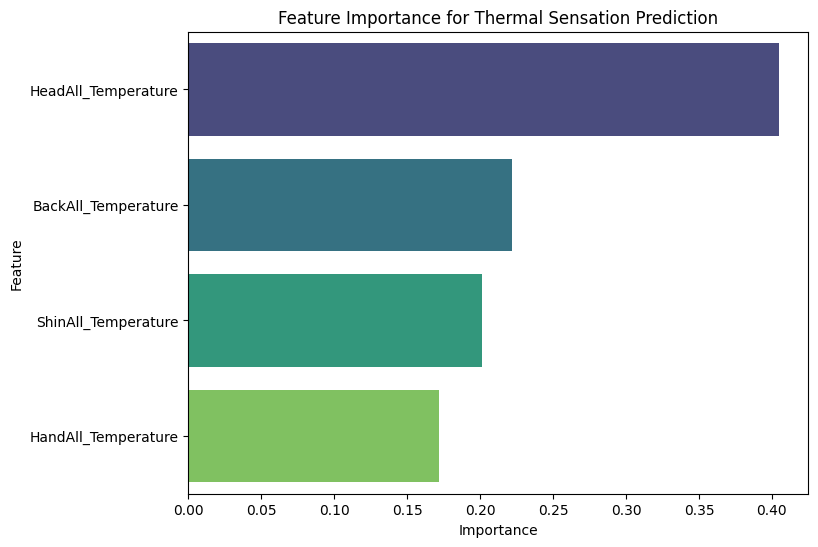

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with your actual dataset path
df = pd.read_csv(r'C:\Users\AMUS\python\Yolov8_overall\updated_yolo\Yolov8_overall.csv')

# Step 2: Clean and preprocess the data
# Drop rows with NaN values in the 'Votes' column
df = df.dropna(subset=["sensation"])

# Map vote classes to start from 0 (required by XGBoost)
class_mapping = {-3: 0, -2: 1, -1: 2, 0: 3, 1: 4, 2: 5, 3: 6}  # Adjust as needed
df["sensation"] = df["sensation"].map(class_mapping)

# Ensure no NaN values are present after mapping
assert df["sensation"].isna().sum() == 0, "Mapping introduced NaN values. Check the data."

# Prepare features (X) and target (y)
X = df[["HeadAll_Temperature", "HandAll_Temperature", "ShinAll_Temperature", "BackAll_Temperature"]].values  # Multiple features
y = df["sensation"].values.astype(int)  # Target labels as integers

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the XGBoost Classifier
xg_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # Classification objective
    num_class=len(set(y)),     # Number of unique vote categories
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.1,         # Step size shrinkage
    max_depth=3,               # Maximum tree depth
    random_state=42
)

# Train the model
xg_clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = xg_clf.predict(X_test)

# Step 6: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(class_mapping.values()), yticklabels=sorted(class_mapping.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for thermal Sensation Prediction (Yolo)")
plt.show()

# Step 7: Save and Load the Model
# Save the trained model to a file
joblib.dump(xg_clf, "xgboost_votes_classifier_yolo.pkl")

# Load the saved model (if needed)
xg_clf_loaded = joblib.load("xgboost_votes_classifier_yolo.pkl")

# Use the loaded model to make predictions
# y_pred_loaded = xg_clf_loaded.predict(X_test)
importance = xg_clf.feature_importances_

# Create a DataFrame for better visualization
feature_names = ["HeadAll_Temperature", "HandAll_Temperature", "ShinAll_Temperature", "BackAll_Temperature"]
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance for Thermal Sensation Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       156
           1       0.79      0.80      0.79       618
           2       0.76      0.89      0.82       752
           3       0.94      0.68      0.79       355
           4       0.98      0.72      0.83       146
           5       1.00      1.00      1.00         6

    accuracy                           0.82      2033
   macro avg       0.90      0.83      0.86      2033
weighted avg       0.83      0.82      0.81      2033



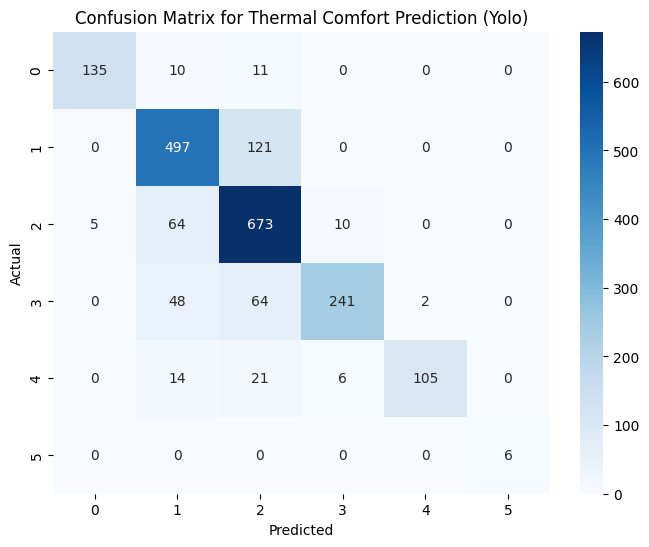

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with your actual dataset path
df = pd.read_csv(r'C:\Users\AMUS\python\Yolov8_overall\updated_yolo\Yolov8_overall.csv')

class_mapping = {-3: 0, -2: 1, -1: 2, 1: 3, 2: 4, 3: 5}

# Apply mapping to comfort column
df["comfort"] = df["comfort"].map(class_mapping)

# Check for NaN values and handle them
df["comfort"].isna().sum() > 0


# Drop NaN rows if there are any
df = df.dropna(subset=["comfort"])

# Verify unique comfort values
df["comfort"].unique()
# Now proceed with your usual feature extraction and model training steps
X = df[["HeadAll_Temperature", "HandAll_Temperature", "ShinAll_Temperature", "BackAll_Temperature"]].values
y = df["comfort"].values.astype(int)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the XGBoost Classifier
xg_clf = xgb.XGBClassifier(
    objective='multi:softmax',  # Classification objective
    num_class=len(set(y)),     # Number of unique vote categories
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.1,         # Step size shrinkage
    max_depth=3,               # Maximum tree depth
    random_state=42
)

# Train the model
xg_clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = xg_clf.predict(X_test)

# Step 6: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(class_mapping.values()), yticklabels=sorted(class_mapping.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Thermal Comfort Prediction (Yolo)")
plt.show()

# Step 7: Save and Load the Model
# Save the trained model to a file
joblib.dump(xg_clf, "xgboost_votes_classifier1_yolo.pkl")

# Load the saved model (if needed)
xg_clf_loaded = joblib.load("xgboost_votes_classifier1_yolo.pkl")

# Use the loaded model to make predictions
# y_pred_loaded = xg_clf_loaded.predict(X_test)
